In [1]:
!wget https://i.ibb.co/6n3Ph0n/low-light-image.png

--2024-07-31 18:45:27--  https://i.ibb.co/6n3Ph0n/low-light-image.png
Resolving i.ibb.co (i.ibb.co)... 169.197.85.95
Connecting to i.ibb.co (i.ibb.co)|169.197.85.95|:443... connected.
HTTP request sent, awaiting response... 503 Service Temporarily Unavailable
2024-07-31 18:45:52 ERROR 503: Service Temporarily Unavailable.



In [2]:
!pip install transformers huggingface_hub

In [3]:
import transformers
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from huggingface_hub import from_pretrained_keras

In [4]:
model = from_pretrained_keras("keras-io/low-light-image-enhancement")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

variables/variables.data-00000-of-00001:   0%|          | 0.00/325k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/153k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

lol_dataset.zip:   0%|          | 0.00/347M [00:00<?, ?B/s]

In [5]:
# create inference function
def inference(o_image):
  # preprocess for the model
  image = keras.preprocessing.image.img_to_array(o_image)
  image = image.astype("float32") / 255.0
  image = np.expand_dims(image, axis=0) # create batch of 1 image
  print(image.shape) # should be (1, H, W, C)
  output_image = model(image) # run the image through model
  output_image = post_process(image, output_image) # will implement this later
  output_image = tf.cast((output_image[0, :, :, :] * 255), dtype=np.uint8) # processing for PIL.Image
  output_image = Image.fromarray(output_image.numpy())
  return output_image

In [6]:
def post_process(image, output):
  # from zero_dce post process
  r1 = output[:, :, :, :3]
  r2 = output[:, :, :, 3:6]
  r3 = output[:, :, :, 6:9]
  r4 = output[:, :, :, 9:12]
  r5 = output[:, :, :, 12:15]
  r6 = output[:, :, :, 15:18]
  r7 = output[:, :, :, 18:21]
  r8 = output[:, :, :, 21:24]
  x = image + r1 * (tf.square(image) - image)
  x = x + r2 * (tf.square(x) - x)
  enhanced_img = x + r4 * (tf.square(x) - x)
  x = enhanced_img + r5 * (tf.square(enhanced_img) - enhanced_img)
  x = x + r6 * (tf.square(x) - x)
  x = x + r7 * (tf.square(x) - x)
  enhanced_img = x + r8 * (tf.square(x) - x)
  return enhanced_img

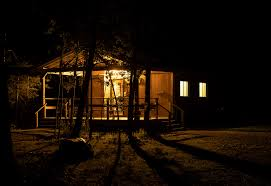

In [15]:
orig = Image.open("download (4).jpeg")
orig

(1, 186, 271, 3)


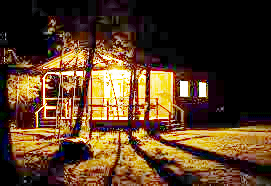

In [16]:
enhanced = inference(orig)
enhanced

In [12]:
# you can see the ZeroDCE model does a very good job of predicting the colors of the stadium and enhancing it.
# That's it for this video. see you in the next one